Code is copied from http://ipython-books.github.io/featured-05/.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
a = 2.8e-4
b = 5e-3
tau = .1
k = -.005
size = 100  # size of the 2D grid
dx = 2./size  # space step
T = 50.0  # total time
dt = .9 * dx**2/2  # time step
n = int(T/dt)
U = np.random.rand(size, size)
V = np.random.rand(size, size)

def laplacian(Z):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / dx**2

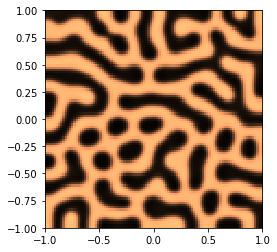

In [2]:
# We simulate the PDE with the finite difference method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1,1:-1]
    Vc = V[1:-1,1:-1]
    # We update the variables.
    U[1:-1,1:-1],V[1:-1,1:-1]=Uc+dt*(a*deltaU+Uc-Uc**3-Vc+k),Vc+dt*(b*deltaV+Uc-Vc)/tau
    # Neumann conditions: derivatives at the edges are null.
    for Z in (U, V):
        Z[0,:] = Z[1,:]
        Z[-1,:] = Z[-2,:]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]
    #if i%5000==0:
        #plt.imshow(U, cmap=plt.cm.copper, extent=[-1,1,-1,1])
        #plt.xticks([])
        #plt.yticks([])
        #plt.savefig('turing_'+str(i)+'.png')
plt.imshow(U, cmap=plt.cm.copper, extent=[-1,1,-1,1])